In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import ML libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

#import NN libraries
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

#avoid convergence warning which is useless
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore")

Using TensorFlow backend.
C:\Users\samsung\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\samsung\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\samsung\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in versio

In [2]:
data = pd.read_csv('credit_card_default_TRAIN.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 25 columns):
Variable    22501 non-null object
X1          22501 non-null object
X2          22501 non-null object
X3          22501 non-null object
X4          22501 non-null object
X5          22501 non-null object
X6          22501 non-null object
X7          22501 non-null object
X8          22501 non-null object
X9          22501 non-null object
X10         22501 non-null object
X11         22501 non-null object
X12         22501 non-null object
X13         22501 non-null object
X14         22501 non-null object
X15         22501 non-null object
X16         22501 non-null object
X17         22501 non-null object
X18         22501 non-null object
X19         22501 non-null object
X20         22501 non-null object
X21         22501 non-null object
X22         22501 non-null object
X23         22501 non-null object
Y           22501 non-null object
dtypes: object(25)
memory usage: 4.3+ MB


# DATA ENGINEERING

**Rename columns with intuitive names**

In [4]:
dic_col = {'X1':'LIMIT_BAL','X2': 'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE',
         'X6':'PAY_1','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',
        'X12':'BILL_AMT1','X13':'BILL_AMT2','X14':'BILL_AMT3','X15':'BILL_AMT4','X16':'BILL_AMT5','X17':'BILL_AMT6',
        'X18':'PAY_AMT1','X19':'PAY_AMT2','X20':'PAY_AMT3','X21':'PAY_AMT4','X22':'PAY_AMT5','X23':'PAY_AMT6'}

data = data.rename(dic_col, axis=1)
df = data.iloc[1:].astype('int32')
df = df.rename(columns={'Y': 'pay_status'})
df

,Variable,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_status
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,22496,50000,2,3,3,46,-2,-1,0,0,...,19792,19422,19830,7084,1000,19286,664,689,761,0
22497,22497,50000,2,3,1,32,0,0,0,0,...,15996,32714,16720,1868,2300,1239,600,600,600,1
22498,22498,440000,2,2,1,46,0,0,0,0,...,149944,113135,105280,7700,8610,6907,3727,3800,4001,0
22499,22499,150000,2,2,2,38,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


**Analysis of multiple columns to know more about the provided features**

In [5]:
df.LIMIT_BAL.describe()

count      22500.000000
mean      163424.608000
std       128515.245979
min        10000.000000
25%        50000.000000
50%       135000.000000
75%       230000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [6]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,22500.000000,22500.000000,22500.000000
mean,1.610178,1.840667,1.564133
std,0.487721,0.775181,0.521311
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000
mean,50340.516000,48361.388311,4.609077e+04,42008.863511,39750.329956,38353.361956
std,71747.640023,69498.374865,6.735400e+04,62189.619882,59596.457496,58733.356897
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-46627.000000,-339603.000000
25%,3785.750000,3221.500000,2.909500e+03,2400.000000,1795.750000,1243.750000
50%,22717.500000,21745.500000,2.024350e+04,19051.000000,18259.500000,17175.000000
75%,65593.000000,62711.250000,5.915425e+04,51814.500000,49635.500000,48739.750000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [8]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,5495.471067,5.784070e+03,4870.560533,4692.143200,4694.131200,5088.028222
std,15087.642904,2.113294e+04,15959.242382,14823.164919,15023.608194,17300.349898
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,7.980000e+02,367.000000,270.000000,247.000000,56.000000
50%,2098.000000,2.000000e+03,1676.000000,1500.000000,1500.000000,1463.000000
75%,5000.000000,5.000000e+03,4193.750000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000


In [9]:
df['MARRIAGE'].value_counts()

2    12219
1     9990
3      255
0       36
Name: MARRIAGE, dtype: int64

In [10]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,22500.000000,22500.000000,22500.000000
mean,1.610178,1.840667,1.564133
std,0.487721,0.775181,0.521311
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [11]:
df['EDUCATION'].value_counts(), df['MARRIAGE'].value_counts()

(2    10634
 1     7982
 3     3581
 5      184
 4       76
 6       33
 0       10
 Name: EDUCATION, dtype: int64, 2    12219
 1     9990
 3      255
 0       36
 Name: MARRIAGE, dtype: int64)

#### Visualization of data 

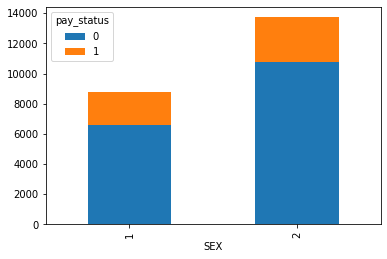

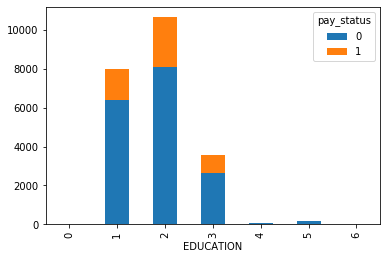

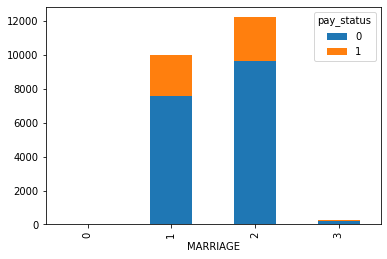

In [12]:
sexplot = df.groupby(['SEX', 'pay_status']).size().unstack(1)
sexplot.plot(kind='bar', stacked = True)

eduplot = df.groupby(['EDUCATION', 'pay_status']).size().unstack(1)
eduplot.plot(kind='bar', stacked = True)

marrplot = df.groupby(['MARRIAGE', 'pay_status']).size().unstack(1)
marrplot.plot(kind='bar', stacked = True)

In [13]:
df

,Variable,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_status
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,22496,50000,2,3,3,46,-2,-1,0,0,...,19792,19422,19830,7084,1000,19286,664,689,761,0
22497,22497,50000,2,3,1,32,0,0,0,0,...,15996,32714,16720,1868,2300,1239,600,600,600,1
22498,22498,440000,2,2,1,46,0,0,0,0,...,149944,113135,105280,7700,8610,6907,3727,3800,4001,0
22499,22499,150000,2,2,2,38,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


#### Features engineering

In [14]:
#Definition of MARSEX feature

df['MARRSEX'] = df.SEX * df.MARRIAGE

#Categorization of PAY_n

bol = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[bol, 'PAY_1'] = 0
bol = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[bol, 'PAY_2'] = 0
bol = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[bol, 'PAY_3'] = 0
bol = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[bol, 'PAY_4'] = 0
bol = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[bol, 'PAY_5'] = 0
bol = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[bol, 'PAY_6'] = 0

#Categorization of AGE

df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6

#Definition of C_n

df['C6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['C5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['C4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['C3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['C2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['C1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL

#Definition of AGESEX

df['AGESEX'] = 0

df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'AGESEX'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'AGESEX'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'AGESEX'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'AGESEX'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'AGESEX'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'AGESEX'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'AGESEX'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'AGESEX'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'AGESEX'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'AGESEX'] = 10 #woman in 60's and above

#Definition of EXP step by step

df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']

df['exp'] = (df['Avg_exp_1']+df['Avg_exp_2']+df['Avg_exp_3']+df['Avg_exp_4']+df['Avg_exp_5'])/5

#Get rid of useless features

df=df.drop(['Avg_exp_1'],axis=1)
df=df.drop(['Avg_exp_2'],axis=1)
df=df.drop(['Avg_exp_3'],axis=1)
df=df.drop(['Avg_exp_4'],axis=1)
df=df.drop(['Avg_exp_5'],axis=1)

df.drop(['Variable'],axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,MARRSEX,AgeBin,C6,C5,C4,C3,C2,C1,AGESEX,exp
1,20000,2,2,1,24,2,2,0,0,0,...,2,1,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350,6,0.020978
2,120000,2,2,2,26,0,2,0,0,0,...,4,1,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650,6,0.003372
3,90000,2,2,2,34,0,0,0,0,0,...,4,2,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122,7,0.012917
4,50000,2,2,1,37,0,0,0,0,0,...,2,2,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200,7,0.078552
5,50000,1,2,1,57,0,0,0,0,0,...,1,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660,4,0.155530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,50000,2,3,3,46,0,0,0,0,0,...,6,3,0.603400,0.611560,0.604160,0.929880,0.948200,1.029880,8,0.019826
22497,50000,2,3,1,32,0,0,0,0,0,...,2,2,0.665600,0.345720,0.680080,0.280480,0.309120,0.335380,7,0.137312
22498,440000,2,2,1,46,0,0,0,0,0,...,2,3,0.760727,0.742875,0.659218,0.587370,0.589452,0.596761,8,0.051439
22499,150000,2,2,2,38,0,0,0,0,0,...,4,2,1.000000,1.000000,1.000000,1.000000,1.000000,0.991720,7,0.000331


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 1 to 22500
Data columns (total 35 columns):
Variable      22500 non-null int32
LIMIT_BAL     22500 non-null int32
SEX           22500 non-null int32
EDUCATION     22500 non-null int32
MARRIAGE      22500 non-null int32
AGE           22500 non-null int32
PAY_1         22500 non-null int32
PAY_2         22500 non-null int32
PAY_3         22500 non-null int32
PAY_4         22500 non-null int32
PAY_5         22500 non-null int32
PAY_6         22500 non-null int32
BILL_AMT1     22500 non-null int32
BILL_AMT2     22500 non-null int32
BILL_AMT3     22500 non-null int32
BILL_AMT4     22500 non-null int32
BILL_AMT5     22500 non-null int32
BILL_AMT6     22500 non-null int32
PAY_AMT1      22500 non-null int32
PAY_AMT2      22500 non-null int32
PAY_AMT3      22500 non-null int32
PAY_AMT4      22500 non-null int32
PAY_AMT5      22500 non-null int32
PAY_AMT6      22500 non-null int32
pay_status    22500 non-null int32
MARRSEX       22

In [16]:
#Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [17]:
y = df['pay_status'].copy()
X = df.copy()
X = X.drop(['pay_status'],1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Usual samplings to correct the inbalanced dataset**

In [18]:
dft = X_train.join(y_train)

df_majority = dft[dft.pay_status==0] #only examples with label 0

df_minority = dft[dft.pay_status==1] #only examples with label 1

In [19]:
# Upsample minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.pay_status.value_counts()

1    18677
0    13904
Name: pay_status, dtype: int64

In [20]:
#Upsampling

y_upsampled = df_upsampled.pay_status
X_upsampled = df_upsampled.drop(['pay_status'], axis= 1)

In [21]:
# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.pay_status.value_counts()

0    5323
1    4096
Name: pay_status, dtype: int64

In [22]:
#Downsampling

y_downsampled = df_downsampled.pay_status
X_downsampled = df_downsampled.drop(['pay_status'], axis = 1)

In [23]:
#SMOTE sampling

X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)

# TRAINING

**NAIVE BAYES GAUSSIAN**

In [24]:
# normal training set
param_grid = {'var_smoothing': [10**(-k) for k in range(-100,100)]}

acc_scorer = make_scorer(accuracy_score)
grid_naive_gauss = GridSearchCV(GaussianNB(), param_grid, scoring = acc_scorer, cv=5)
%time grid_naive_gauss = grid_naive_gauss.fit(X_train, y_train)

print(grid_naive_gauss.best_estimator_)
print(grid_naive_gauss.best_score_)

naive_gauss_normal = grid_naive_gauss.best_estimator_

Wall time: 20.7 s
GaussianNB(priors=None,
           var_smoothing=10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000)
0.7724444444444444


In [25]:
# upsampled training set
param_grid = {'var_smoothing': [10**(-k) for k in range(-100,100)]}

acc_scorer = make_scorer(accuracy_score)
grid_naive_gauss = GridSearchCV(GaussianNB(), param_grid, scoring = acc_scorer, cv=5)
%time grid_naive_gauss = grid_naive_gauss.fit(X_upsampled, y_upsampled)

print(grid_naive_gauss.best_estimator_)
print(grid_naive_gauss.best_score_)

naive_gauss_upsampled = grid_naive_gauss.best_estimator_

Wall time: 39.7 s
GaussianNB(priors=None, var_smoothing=1e-11)
0.6711888291782185


In [26]:
# downsampled training set
param_grid = {'var_smoothing': [10**(-k) for k in range(-100,100)]}

acc_scorer = make_scorer(accuracy_score)
grid_naive_gauss = GridSearchCV(GaussianNB(), param_grid, scoring = acc_scorer, cv=5)
%time grid_naive_gauss = grid_naive_gauss.fit(X_downsampled, y_downsampled)

print(grid_naive_gauss.best_estimator_)
print(grid_naive_gauss.best_score_)

naive_gauss_downsampled = grid_naive_gauss.best_estimator_

Wall time: 17.8 s
GaussianNB(priors=None, var_smoothing=1e-11)
0.7071872818930807


In [27]:
# SMOTE training set
param_grid = {'var_smoothing': [10**(-k) for k in range(-100,100)]}

acc_scorer = make_scorer(accuracy_score)
grid_naive_gauss = GridSearchCV(GaussianNB(), param_grid, scoring = acc_scorer, cv=5)
%time grid_naive_gauss = grid_naive_gauss.fit(X_SMOTE, y_SMOTE)

print(grid_naive_gauss.best_estimator_)
print(grid_naive_gauss.best_score_)

naive_gauss_SMOTE = grid_naive_gauss.best_estimator_

Wall time: 31.2 s
GaussianNB(priors=None, var_smoothing=1e-15)
0.6833653569663541


**Logistic Regression**

In [34]:
# normal training set
param_grid = {'C': [10**(-k) for k in range(0,6)],
              'penalty': ['l1', 'l2', 'none', 'elasticnet'], #the four possible penalties in Logistic Regression
             'solver':['saga']} #solver saga works for all penalties

acc_scorer = make_scorer(accuracy_score)
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = acc_scorer, cv=5)
%time grid_lr = grid_lr.fit(X_train, y_train)

print(grid_lr.best_estimator_)
print(grid_lr.best_score_)

lr_normal = grid_lr.best_estimator_

Wall time: 2min 36s
LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
0.7723888888888888


In [39]:
# upsampled training set
param_grid = {'C': [10**(-k) for k in range(-5,2)], #range not the same cause I tested many C's and larger C gives better results
              'penalty': ['l1', 'l2', 'none', 'elasticnet'], #the four possible penalties in Logistic Regression
             'solver':['saga']} #solver saga works for all penalties

acc_scorer = make_scorer(accuracy_score)
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = acc_scorer, cv=5)
%time grid_lr = grid_lr.fit(X_upsampled, y_upsampled)

print(grid_lr.best_estimator_)
print(grid_lr.best_score_)

lr_upsampled = grid_lr.best_estimator_

Wall time: 6min 32s
LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
0.6006567938243023


In [38]:
# downsampled training set
param_grid = {'C': [10**(-k) for k in range(0,6)],
              'penalty': ['l1', 'l2', 'none', 'elasticnet'], #the four possible penalties in Logistic Regression
             'solver':['saga']} #solver saga works for all penalties

acc_scorer = make_scorer(accuracy_score)
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = acc_scorer, cv=5)
%time grid_lr = grid_lr.fit(X_downsampled, y_downsampled)

print(grid_lr.best_estimator_)
print(grid_lr.best_score_)

lr_downsampled = grid_lr.best_estimator_

Wall time: 1min 19s
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
0.6312761516890989


In [40]:
# SMOTE training set
param_grid = {'C': [10**(-k) for k in range(0,6)],
              'penalty': ['l1', 'l2', 'none', 'elasticnet'], #the four possible penalties in Logistic Regression
             'solver':['saga']} #solver saga works for all penalties

acc_scorer = make_scorer(accuracy_score)
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = acc_scorer, cv=5)
%time grid_lr = grid_lr.fit(X_SMOTE, y_SMOTE)

print(grid_lr.best_estimator_)
print(grid_lr.best_score_)

lr_SMOTE = grid_lr.best_estimator_

Wall time: 4min 8s
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
0.6128812210635519


## Most important algorithms

**RANDOM FOREST**

In [55]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have

acc_scorer = make_scorer(accuracy_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)

print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

forest_normal = grid_forest.best_estimator_

Wall time: 8min 50s
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.8125555555555556


In [47]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}

acc_scorer = make_scorer(accuracy_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)

print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

forest_upsampled = grid_forest.best_estimator_

Wall time: 25min 23s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.9489579816457444


In [48]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}

acc_scorer = make_scorer(accuracy_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)

print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

forest_downsampled = grid_forest.best_estimator_

Wall time: 9min 13s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7219450047775773


In [49]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}

acc_scorer = make_scorer(accuracy_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)

print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

forest_SMOTE = grid_forest.best_estimator_

Wall time: 18min 22s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.8643196202531646


**ADABOOST**

In [33]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
                        param_grid, scoring = acc_scorer, cv=5)

%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_normal = grid_ada.best_estimator_

Wall time: 55.2 s
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',

In [30]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_upsampled = grid_ada.best_estimator_

Wall time: 16min 39s
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=None)
0.7249317086645591


In [37]:
# downsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_downsampled = grid_ada.best_estimator_

Wall time: 9min 27s
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=200, random_state=None)
0.7217326680114662


In [38]:
# SMOTE training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)

print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

ada_SMOTE = grid_ada.best_estimator_

Wall time: 37min 53s
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.75,
                   n_estimators=300, random_state=None)
0.8563722669735327


**GRADIENT BOOST/XG BOOST**

In [32]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_train, y_train)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_normal = grid_gbc.best_estimator_

Wall time: 3min 12s
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7952222222222223


In [33]:
#upsampled training set

param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_upsampled = grid_gbc.best_estimator_

Wall time: 5min 46s
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8579540222829256


In [34]:
#downsampled training set

param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(accuracy_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_

Wall time: 1min 40s
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.6951905722475846


In [35]:
#SMOTE training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(accuracy_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

gbc_SMOTE = grid_gbc.best_estimator_

Wall time: 10min 22s
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8479214614499425


**Neural Network**

# TESTING

**RANDOMFOREST**

In [56]:
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 43.1 s
Accuracy: 0.814


In [52]:
# Upsample training
%time forest_upsampled.fit(X_upsampled, y_upsampled)
predictions = forest_upsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 15.7 s
Accuracy: 0.808


In [53]:
#Downsample training
%time forest_downsampled.fit(X_downsampled, y_downsampled)
predictions = forest_downsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 10.6 s
Accuracy: 0.77


In [54]:
# SMOTE training
%time forest_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = forest_SMOTE.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 10.1 s
Accuracy: 0.805


**ADABOOST**

In [39]:
# Normal sample training
%time ada_normal.fit(X_train, y_train)
predictions = ada_normal.predict(X_test)

print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 999 ms
Accuracy: 0.731


In [40]:
# Upsample training
%time ada_upsampled.fit(X_upsampled, y_upsampled)
predictions = ada_upsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 45.1 s
Accuracy: 0.685


In [41]:
# Downsample training
%time ada_downsampled.fit(X_downsampled, y_downsampled)
predictions = ada_downsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 9.61 s
Accuracy: 0.779


In [42]:
# SMOTE training
%time ada_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = ada_SMOTE.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 55.7 s
Accuracy: 0.815


**Gradboost**

In [43]:
# Normal sample training
%time gbc_normal.fit(X_train, y_train)
predictions = gbc_normal.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 13.5 s
Accuracy: 0.8


In [44]:
# Upsample training
%time gbc_upsampled.fit(X_upsampled, y_upsampled)
predictions = gbc_upsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 34.8 s
Accuracy: 0.721


In [45]:
# Downsample training
%time gbc_downsampled.fit(X_downsampled, y_downsampled)
predictions = gbc_downsampled.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 7.26 s
Accuracy: 0.734


In [46]:
# SMOTE training
%time gbc_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = gbc_SMOTE.predict(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

Wall time: 29 s
Accuracy: 0.806


# Features importance

In [146]:
importance_forest_normal=pd.concat((pd.DataFrame(X_train.columns,columns=['feature']),
                         pd.DataFrame(forest_normal.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)
importance_forest_normal.head(5)

,feature,importance
6,PAY_1,0.068631
0,Variable,0.052516
33,exp,0.042468
31,C1,0.040677
12,BILL_AMT1,0.039166


In [148]:
importance_ada_SMOTE=pd.concat((pd.DataFrame(X_train.columns,columns=['feature']),
                         pd.DataFrame(ada_SMOTE.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)
importance_ada_SMOTE.head(5)

,feature,importance
25,AgeBin,0.223333
3,EDUCATION,0.210000
6,PAY_1,0.086667
2,SEX,0.083333
4,MARRIAGE,0.073333


In [149]:
importance_gbc_SMOTE=pd.concat((pd.DataFrame(X_train.columns,columns=['feature']),
                         pd.DataFrame(gbc_SMOTE.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)
importance_gbc_SMOTE.head(5)

,feature,importance
6,PAY_1,0.486669
4,MARRIAGE,0.096983
8,PAY_3,0.060028
2,SEX,0.060005
3,EDUCATION,0.045600


PAY_1, SEX, AgeBin & EDUCATION are the most important for our three algorithms